# Welcome to My Notebook
# We are going to Predict the chances of Heart Attack by using Heart Dataset

![](https://img.freepik.com/premium-photo/pretty-realistic-heart-illustration-with-isolated-background_742252-4113.jpg)


# Import all the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score

import warnings 
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Lets Read the dataset unsing Pandas

In [2]:
dataframe=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
dataframe.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

In [3]:
# Let see the datatype of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# check the shape of data
dataframe.shape

(303, 14)

In [5]:
# Let see the satatistic of data
dataframe.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Lets check the duplicate values in the dataset
dataframe.duplicated().sum()

1

In [7]:
# Remove the duplicate values in the dataset
dataframe.drop_duplicates(inplace=True)

In [8]:
# Let see is there any null values in the dataset
dataframe.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
columns=dataframe.columns.tolist()
columns[13]="HeartAttack"
dataframe.columns=columns
dataframe.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HeartAttack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Let check the dataset is balanced or not

In [10]:
dataframe["HeartAttack"].value_counts()

1    164
0    138
Name: HeartAttack, dtype: int64

In [11]:
# Make the correlation matrix
correlation_matrix= dataframe.corr()
correlation_matrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,HeartAttack
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Lets visualise the correlation matrix

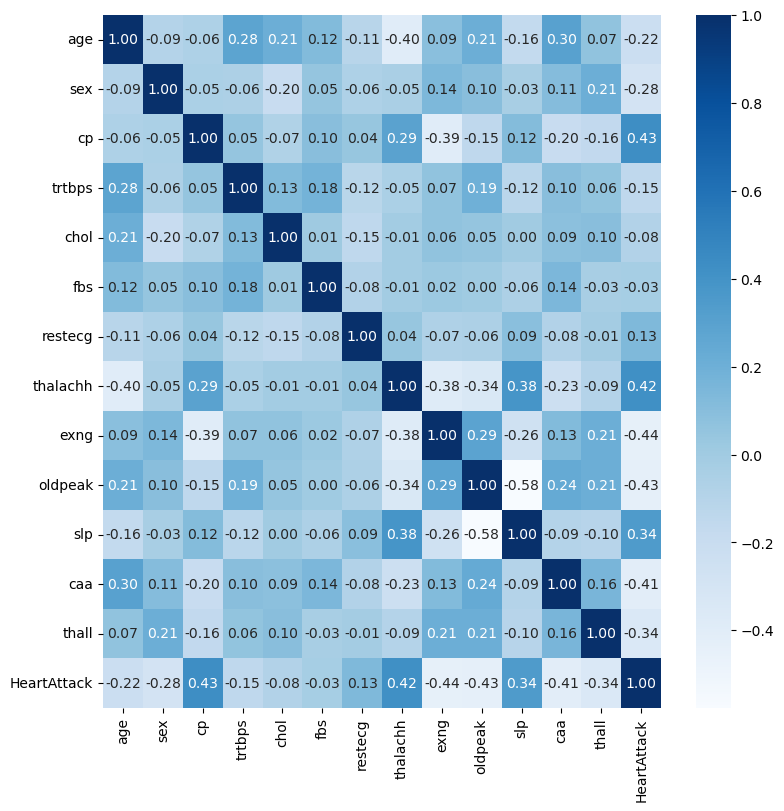

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.show()

# Univariate Analysis

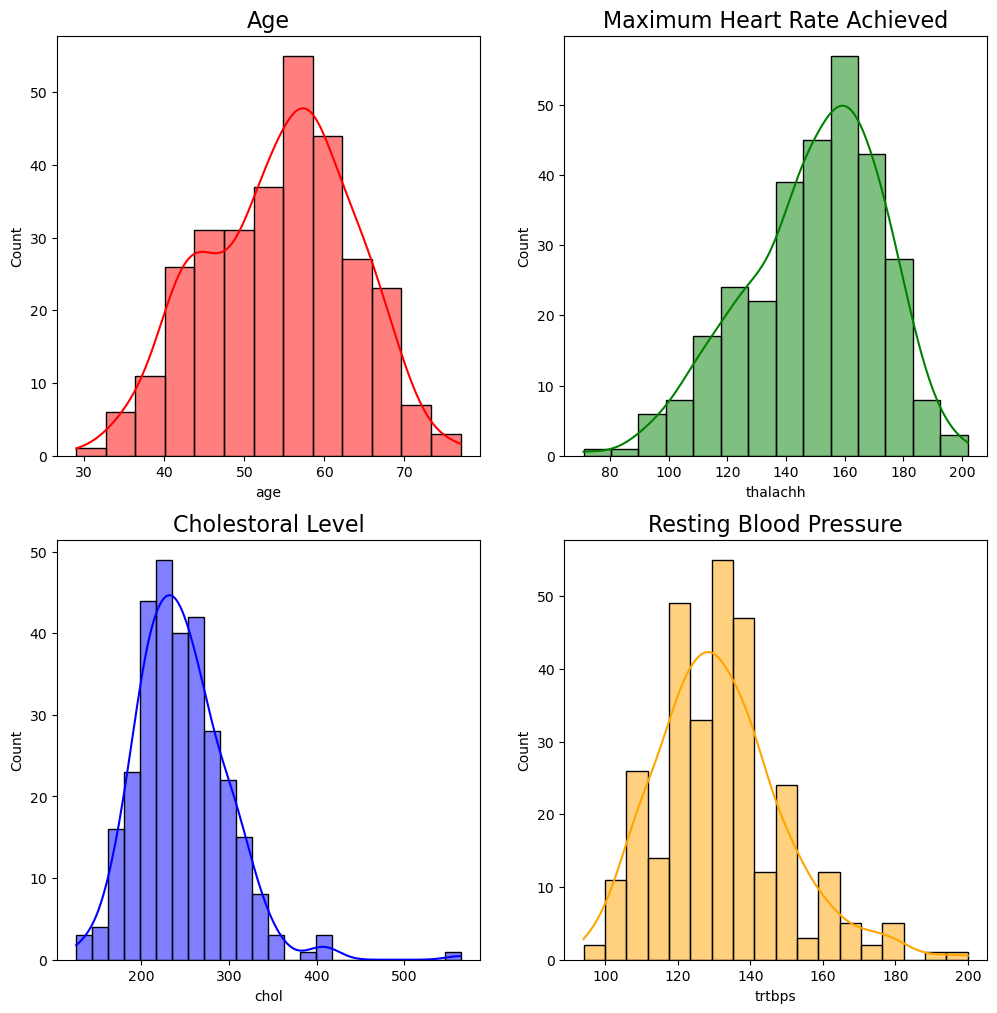

In [13]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(221)
sns.histplot(dataframe["age"], color="red", label="age", kde=True, ax=ax)
ax.set_title('Age', fontsize=16)


ax=fig.add_subplot(222)
sns.histplot(dataframe["thalachh"], color="green", label="age", kde=True, ax=ax)
ax.set_title('Maximum Heart Rate Achieved', fontsize=16)

ax=fig.add_subplot(223)
sns.histplot(dataframe["chol"], color="blue", label="age", kde=True, ax=ax)
ax.set_title('Cholestoral Level', fontsize=16)

ax=fig.add_subplot(224)
sns.histplot(dataframe["trtbps"], color="orange", label="age", kde=True, ax=ax)
ax.set_title('Resting Blood Pressure', fontsize=16)


plt.show()

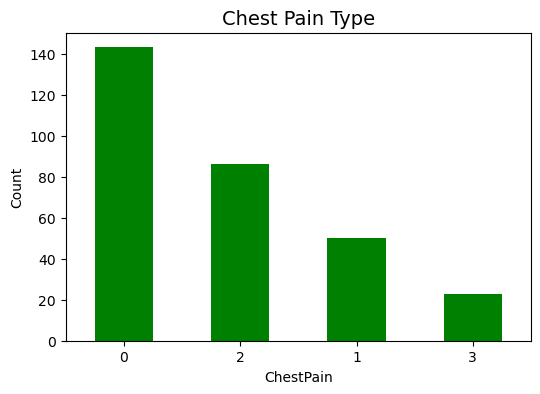

In [14]:
dataframe["cp"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="green")
plt.title("Chest Pain Type", fontsize=14)
plt.xlabel("ChestPain")
plt.ylabel("Count")
plt.show()

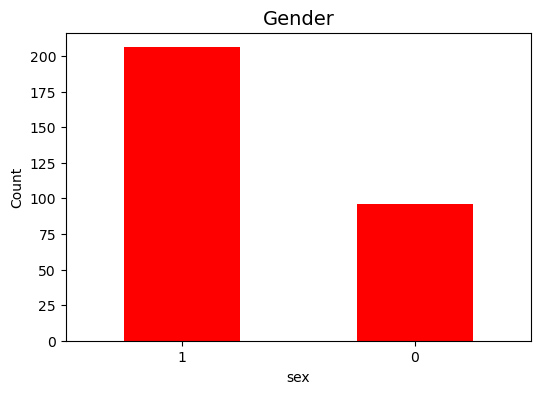

In [15]:
dataframe["sex"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="red")
plt.title("Gender", fontsize=14)
plt.xlabel("sex")
plt.ylabel("Count")
plt.show()

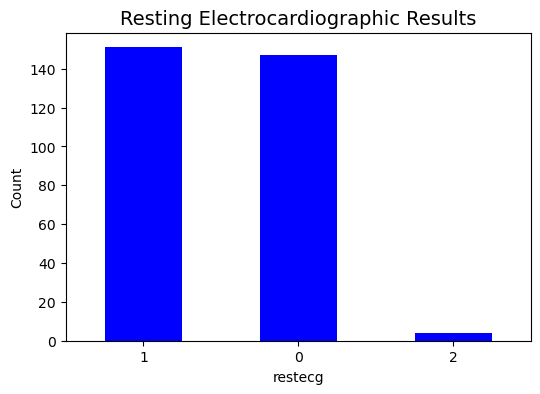

In [16]:
dataframe["restecg"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="blue")
plt.title("Resting Electrocardiographic Results", fontsize=14)
plt.xlabel("restecg")
plt.ylabel("Count")
plt.show()

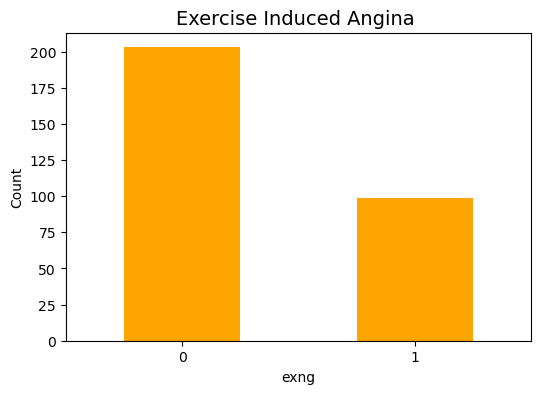

In [17]:
dataframe["exng"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="orange")
plt.title("Exercise Induced Angina ", fontsize=14)
plt.xlabel("exng")
plt.ylabel("Count")
plt.show()

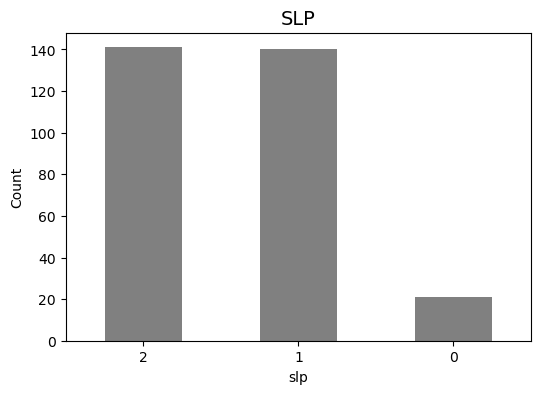

In [18]:
dataframe["slp"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="grey")
plt.title("SLP", fontsize=14)
plt.xlabel("slp")
plt.ylabel("Count")
plt.show()

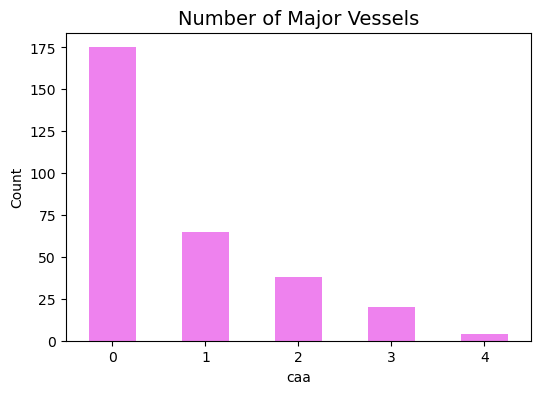

In [19]:
dataframe["caa"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="violet")
plt.title("Number of Major Vessels", fontsize=14)
plt.xlabel("caa")
plt.ylabel("Count")
plt.show()

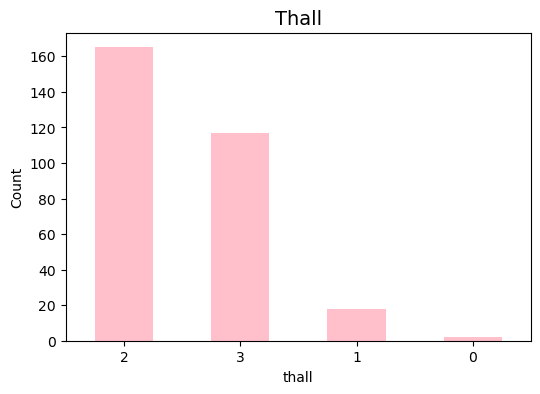

In [20]:
dataframe["thall"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="pink")
plt.title("Thall", fontsize=14)
plt.xlabel("thall")
plt.ylabel("Count")
plt.show()

# Bivariate Analysis

# Detecting Outliers

In [21]:
fig = px.box(dataframe, x="HeartAttack", y="age", title=f"Distrubution of Age")
fig.show()

In [22]:
fig = px.box(dataframe,x="HeartAttack", y="trtbps", title=f"Distrubution of Resting Blood Pressure",color="sex")
fig.show()

In [23]:
fig = px.box(dataframe,x="HeartAttack", y="chol", title=f"Distrubution of Cholesterol", color="sex")
fig.show()

In [24]:
fig = px.box(dataframe,x="HeartAttack", y="thalachh", title=f"Distrubution of Maximum Heart Rate")
fig.show()

In [25]:
fig = px.box(dataframe,x="HeartAttack", y="oldpeak", title=f"Distrubution of Previous Peak")
fig.show()

# Divide the Dataset into Train and Test Set

In [26]:
def train_test_split_data(dataframe,target,test_size, random_state):
    x_train,x_test, y_train, y_test= train_test_split(dataframe.drop([target], axis=1),
                                                      dataframe[target],
                                                      test_size=test_size,
                                                      random_state=random_state,
                                                      stratify=dataframe[target]
                                                      )
    
    return x_train,x_test, y_train, y_test

In [27]:
x_train,x_test, y_train, y_test= train_test_split_data(dataframe,target="HeartAttack",test_size=0.3, random_state=42)

In [28]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((211, 13), (91, 13), (211,), (91,))

# Get the Numerical and Categorical Columns list

In [29]:
def get_numerical_and_categorical_columns(dataframe):
    
    numerical_cols = []
    categorical_cols = []
    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            numerical_cols.append(column)
        else:
            categorical_cols.append(column)
            
    return numerical_cols, categorical_cols

# Lets Detect the outliers in the Training Data And Remove it

In [30]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)
        
        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos) 
                
    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)
    
    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)
    
    
    
    return ratio, x_train, y_train

In [31]:
ratio_of_outliers,x_train,y_train= Winsorization_Method(['age','trtbps','chol', 'thalachh','oldpeak'], x_train, y_train, a=0.5, b=99)

In [32]:
ratio_of_outliers

8.53

In [33]:
x_train.shape, y_train.shape

((193, 13), (193,))

# Data Preprocessing
1. All the features are in numerical form so there is no need for categorical encoding
2. Lets do the Numerical Encoding

In [34]:
robust_scaler= RobustScaler()
x_train=robust_scaler.fit_transform(x_train)
x_test=robust_scaler.transform(x_test)

# Lets do the Modelling

In [35]:

def modelling(x_train, x_test, y_train, y_test):
    # create the empty list to store the results 
    accuracy=[]
    precision=[]
    auc_roc=[]
    recall=[]
    f1=[]


    # Lets create the list of models
    models=[LogisticRegression(),
    GaussianNB(),
    SVC(kernel="linear"),
    KNeighborsClassifier(n_neighbors=32),
    DecisionTreeClassifier(criterion="gini"),
    RandomForestClassifier(n_estimators=200,criterion="gini"),
    XGBClassifier()
     ]

    # Let iterate over the list of models and train and predict it
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        auc_roc.append(roc_auc_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))



    model_names = ['LogisticRegression','GaussianNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
    result_df = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Precision':precision, 'F1_Score':f1, 'AUC_ROC_score':auc_roc},index=model_names)
    result_df=result_df.sort_values(by="Recall", ascending=False)
    return result_df

In [36]:
result_df= modelling(x_train, x_test, y_train, y_test)
result_df

,Accuracy,Recall,Precision,F1_Score,AUC_ROC_score
KNeighborsClassifier,0.835165,0.959184,0.783333,0.862385,0.824830
SVC,0.813187,0.918367,0.775862,0.841121,0.804422
LogisticRegression,0.791209,0.877551,0.767857,0.819048,0.784014
GaussianNB,0.802198,0.877551,0.781818,0.826923,0.795918
RandomForestClassifier,0.769231,0.857143,0.750000,0.800000,0.761905
XGBClassifier,0.747253,0.816327,0.740741,0.776699,0.741497
DecisionTreeClassifier,0.670330,0.673469,0.702128,0.687500,0.670068


# Lets Visulaise the Results 

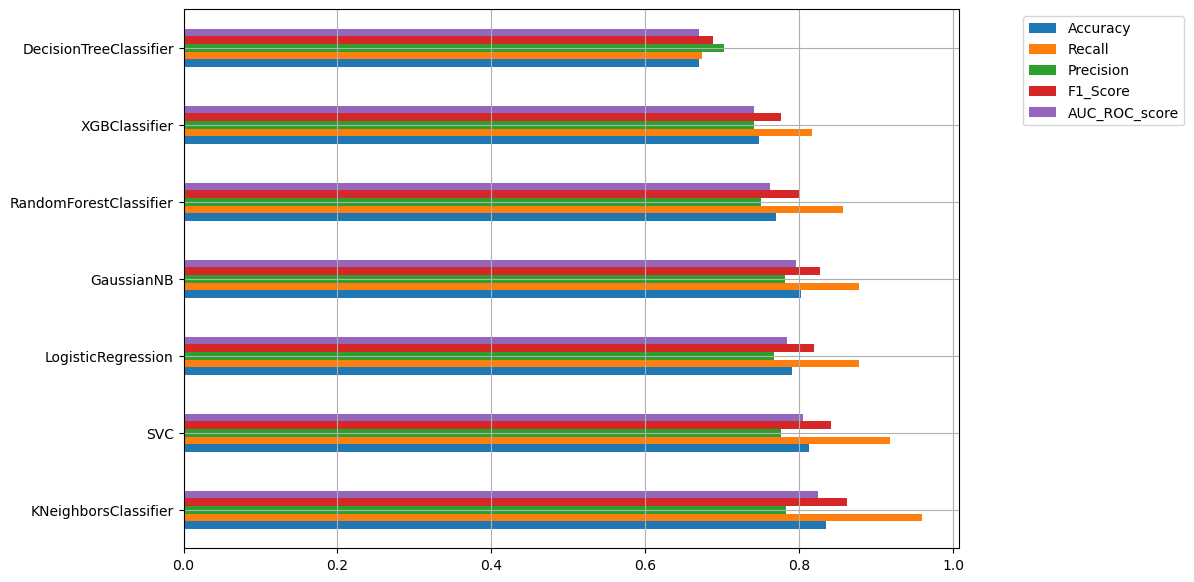

In [37]:
result_df.plot(kind="barh", figsize=(10, 7), grid=True).legend(bbox_to_anchor=(1.3,1));

🚀 
Hi Kagglers,

I hope you enjoyed exploring my notebook! If you found the work insightful or helpful, I kindly invite you to show your support by giving it an upvote. Your appreciation fuels my motivation to continue sharing valuable insights with the community.

Moreover, I believe in continuous improvement, and your feedback plays a crucial role in making my work even better. If you have any suggestions, comments, or thoughts, please don't hesitate to leave them in the comments section. Let's learn and grow together!

Thank you for being a part of this amazing journey. Here's to more exciting collaborations and knowledge sharing ahead. 🌟

![](http://)